**Tech Challeng Fase I**

Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

**1) Exploração de dados: Carregue a base de dados e explore suas características.**
Carregue a base de dados e explore suas características.
Analise estatísticas descritivas e visualize distribuições relevantes.

**2) Pré-processamento de dados:**
Realize a limpeza dos dados, tratando valores ausentes (se necessário).
Converta variáveis categóricas em formatos adequados para modelagem.

**3) Modelagem**
Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (por exemplo, Regressão Linear, Árvores de Decisão, etc).
Divida o conjunto de dados em conjuntos de treinamento e teste.

**4) Treinamento e avaliação do modelo**
Treine o modelo com o conjunto de treinamento.

**5) Validação estatística:**
Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).
*O que avaliaremos:*
Apresente resultados visuais, como gráficos de previsões vs. valores reais.
Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.
Observações: Esperamos que o modelo seja capaz de fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas.

*Entregável*
Como entregável, o grupo deve enviar um vídeo junto com o link do github do projeto e o código desenvolvido, apresentando o passo a passo do que foi utilizado como a fonte de dados e como os modelos foram criados.

O vídeo deve estar em uma plataforma como Youtube.

**Usando o tipo: DecisionTreeRegressor**

In [7]:
# Importando pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

from sklearn import tree
import matplotlib.pyplot as plt

--------------------------------------------------------------------------------

**Passo 0: Carregar base de dados**

In [8]:
import pandas as pd
#subindo a base de dados
# Nome do arquivo Excel e da planilha
arquivo_excel = 'encargos_saude.xlsx'
nome_planilha = 'encargos_saude'

# Ler o arquivo Excel
dados = pd.read_excel(arquivo_excel, sheet_name=nome_planilha)

**Passo 1: Explorando os dados**

In [9]:
# Visualizando  os dados carregados
dados.head()

,Idade,Sexo,IMC,Filhos,Fumante,Comorbidade,Sedentarismo,Encargos
0,65,female,24.16,4,no,0,1,39000.0
1,67,female,19.84,4,no,0,1,39000.0
2,22,male,31.76,1,no,1,1,43680.0
3,24,male,30.79,4,no,0,0,24000.0
4,64,female,19.52,3,no,0,1,39000.0


In [ ]:
# Visualizando quantas linhas e colunas totais
dados.shape

(5000, 8)

In [10]:
# Visualizando os tipos das colunas
print(dados.dtypes)

Idade             int64
Sexo             object
IMC             float64
Filhos            int64
Fumante          object
Comorbidade       int64
Sedentarismo      int64
Encargos        float64
dtype: object


In [11]:
# Verificar a existência de valores nulos
print(dados.isnull().sum())

Idade           0
Sexo            0
IMC             0
Filhos          0
Fumante         0
Comorbidade     0
Sedentarismo    0
Encargos        0
dtype: int64


In [12]:
# Explorando os dados
dados.describe()

,Idade,IMC,Filhos,Comorbidade,Sedentarismo,Encargos
count,5000.00000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000
mean,50.38740,29.111842,3.038200,0.2902,0.396000,45138.645200
std,17.96779,7.523877,1.991264,0.4539,0.489113,20356.236853
min,18.00000,18.510000,0.000000,0.0000,0.000000,16000.000000
25%,34.00000,23.130000,1.000000,0.0000,0.000000,30000.000000
50%,54.00000,27.950000,3.000000,0.0000,0.000000,40320.000000
75%,67.00000,33.432500,5.000000,1.0000,1.000000,54600.000000
max,74.00000,49.980000,6.000000,1.0000,1.000000,163800.000000


------------------------------------------------------------------------------

**Passo 2: Pré-Processando os dados**

In [13]:
# Renomear a coluna 'charge' para 'custo'
dados = dados.rename(columns={'encargos': 'custo'})

In [14]:
# visualizando os dados e o nome das colunas
dados.head()

,Idade,Sexo,IMC,Filhos,Fumante,Comorbidade,Sedentarismo,Encargos
0,65,female,24.16,4,no,0,1,39000.0
1,67,female,19.84,4,no,0,1,39000.0
2,22,male,31.76,1,no,1,1,43680.0
3,24,male,30.79,4,no,0,0,24000.0
4,64,female,19.52,3,no,0,1,39000.0


In [15]:
# Converter as colunas 'sexo' e 'fumante' em valores numéricos
le_sexo = LabelEncoder()
le_fumante = LabelEncoder()

dados['Sexo'] = le_sexo.fit_transform(dados['Sexo'])
dados['Fumante'] = le_fumante.fit_transform(dados['Fumante'])

# Garantir que 'male' seja 1 e 'female' seja 0
if le_sexo.classes_.tolist() == ['female', 'male']:
    pass
elif le_sexo.classes_.tolist() == ['male', 'female']:
    dados['Sexo'] = 1 - dados['Sexo']  # Inverta os valores

# Garantir que 'yes' seja 1 e 'no' seja 0
if le_fumante.classes_.tolist() == ['no', 'yes']:
    pass
elif le_fumante.classes_.tolist() == ['yes', 'no']:
    dados['Fumante'] = 1 - dados['Fumante']  # Inverta os valores

In [ ]:
# Verificando se os dados foram transformados
dados.head()

,idade,sexo,imc,filhos,fumante,comorbidade,sedentarismo,custo
0,65,0,24.16,4,0,0,1,39000.0
1,67,0,19.84,4,0,0,1,39000.0
2,22,1,31.76,1,0,1,1,43680.0
3,24,1,30.79,4,0,0,0,24000.0
4,64,0,19.52,3,0,0,1,39000.0


In [20]:
# Converter colunas para tipo numérico
# Remover separadores de milhar e converter colunas para tipo numérico
for col in ['Idade', 'IMC', 'Encargos', 'Sexo', 'Fumante', 'Filhos', 'Comorbidade', 'Sedentarismo']:
    dados[col] = pd.to_numeric(dados[col], errors='coerce')

In [22]:
# Visualizando os tipos das colunas
print(dados.dtypes)

Idade             int64
Sexo              int64
IMC             float64
Filhos            int64
Fumante           int64
Comorbidade       int64
Sedentarismo      int64
Encargos        float64
dtype: object


In [21]:
# visualizando os dados novamente
dados.head()

,Idade,Sexo,IMC,Filhos,Fumante,Comorbidade,Sedentarismo,Encargos
0,65,0,24.16,4,0,0,1,39000.0
1,67,0,19.84,4,0,0,1,39000.0
2,22,1,31.76,1,0,1,1,43680.0
3,24,1,30.79,4,0,0,0,24000.0
4,64,0,19.52,3,0,0,1,39000.0


In [23]:
# Explorando os dados
dados.describe()

,Idade,Sexo,IMC,Filhos,Fumante,Comorbidade,Sedentarismo,Encargos
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000
mean,50.38740,0.491200,29.111842,3.038200,0.293200,0.2902,0.396000,45138.645200
std,17.96779,0.499973,7.523877,1.991264,0.455275,0.4539,0.489113,20356.236853
min,18.00000,0.000000,18.510000,0.000000,0.000000,0.0000,0.000000,16000.000000
25%,34.00000,0.000000,23.130000,1.000000,0.000000,0.0000,0.000000,30000.000000
50%,54.00000,0.000000,27.950000,3.000000,0.000000,0.0000,0.000000,40320.000000
75%,67.00000,1.000000,33.432500,5.000000,1.000000,1.0000,1.000000,54600.000000
max,74.00000,1.000000,49.980000,6.000000,1.000000,1.0000,1.000000,163800.000000


-----------------------------------------------------------------------------

**Explorando os dados após o pré-processamento**

<Axes: xlabel='Idade', ylabel='Count'>

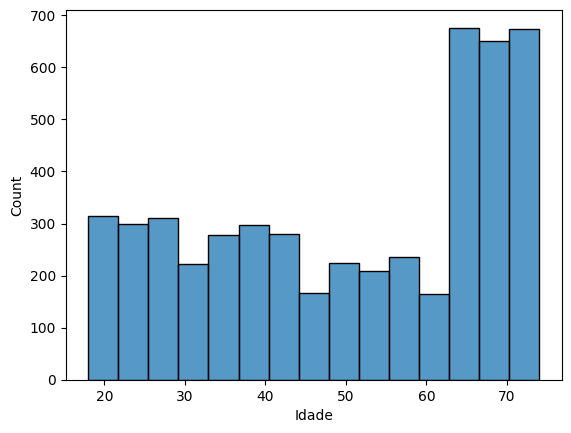

In [25]:
# Explorando os dados em forma de gráfico
sb.histplot(data=dados, x="Idade")

**Identificado que existem muitos registros com idade desbalanceada. Realizando a reamostragem**

<Axes: xlabel='Fumante', ylabel='Count'>

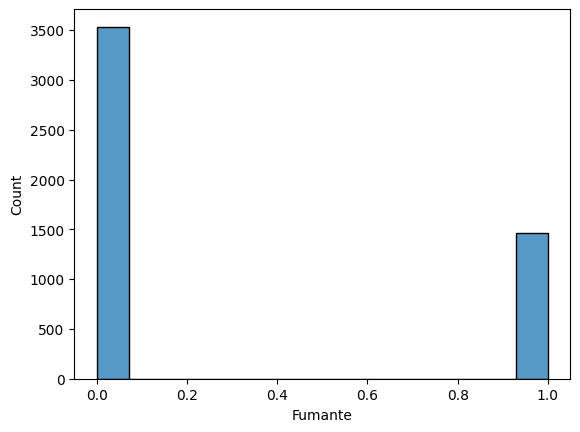

In [26]:
sb.histplot(data=dados, x="Fumante")

<Axes: xlabel='Filhos', ylabel='Count'>

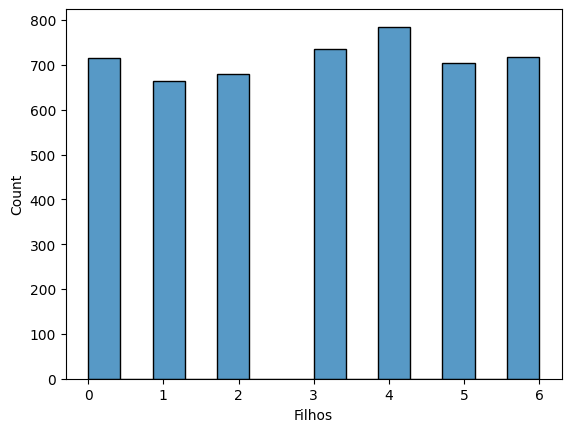

In [27]:
sb.histplot(data=dados, x="Filhos")

<Axes: xlabel='IMC', ylabel='Count'>

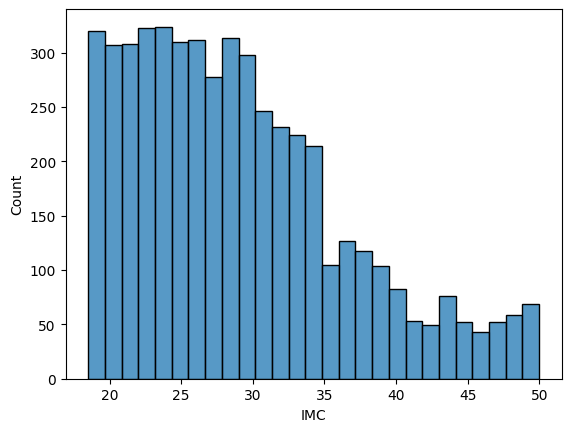

In [28]:
sb.histplot(data=dados, x="IMC")

<Axes: xlabel='Comorbidade', ylabel='Count'>

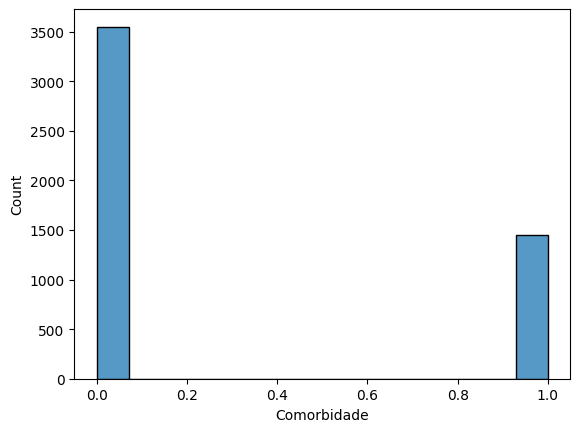

In [29]:
sb.histplot(data=dados, x="Comorbidade")

<Axes: xlabel='Sedentarismo', ylabel='Count'>

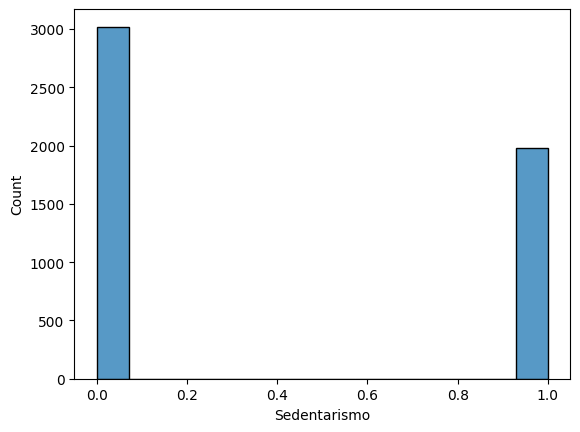

In [30]:
sb.histplot(data=dados, x="Sedentarismo")

<Axes: xlabel='Encargos', ylabel='Idade'>

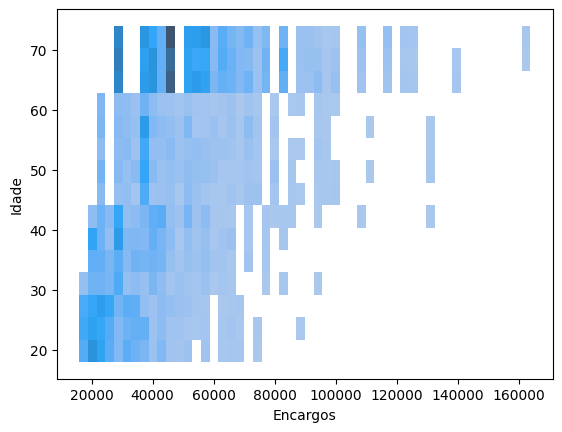

In [31]:
sb.histplot(data=dados, x="Encargos", y="Idade")

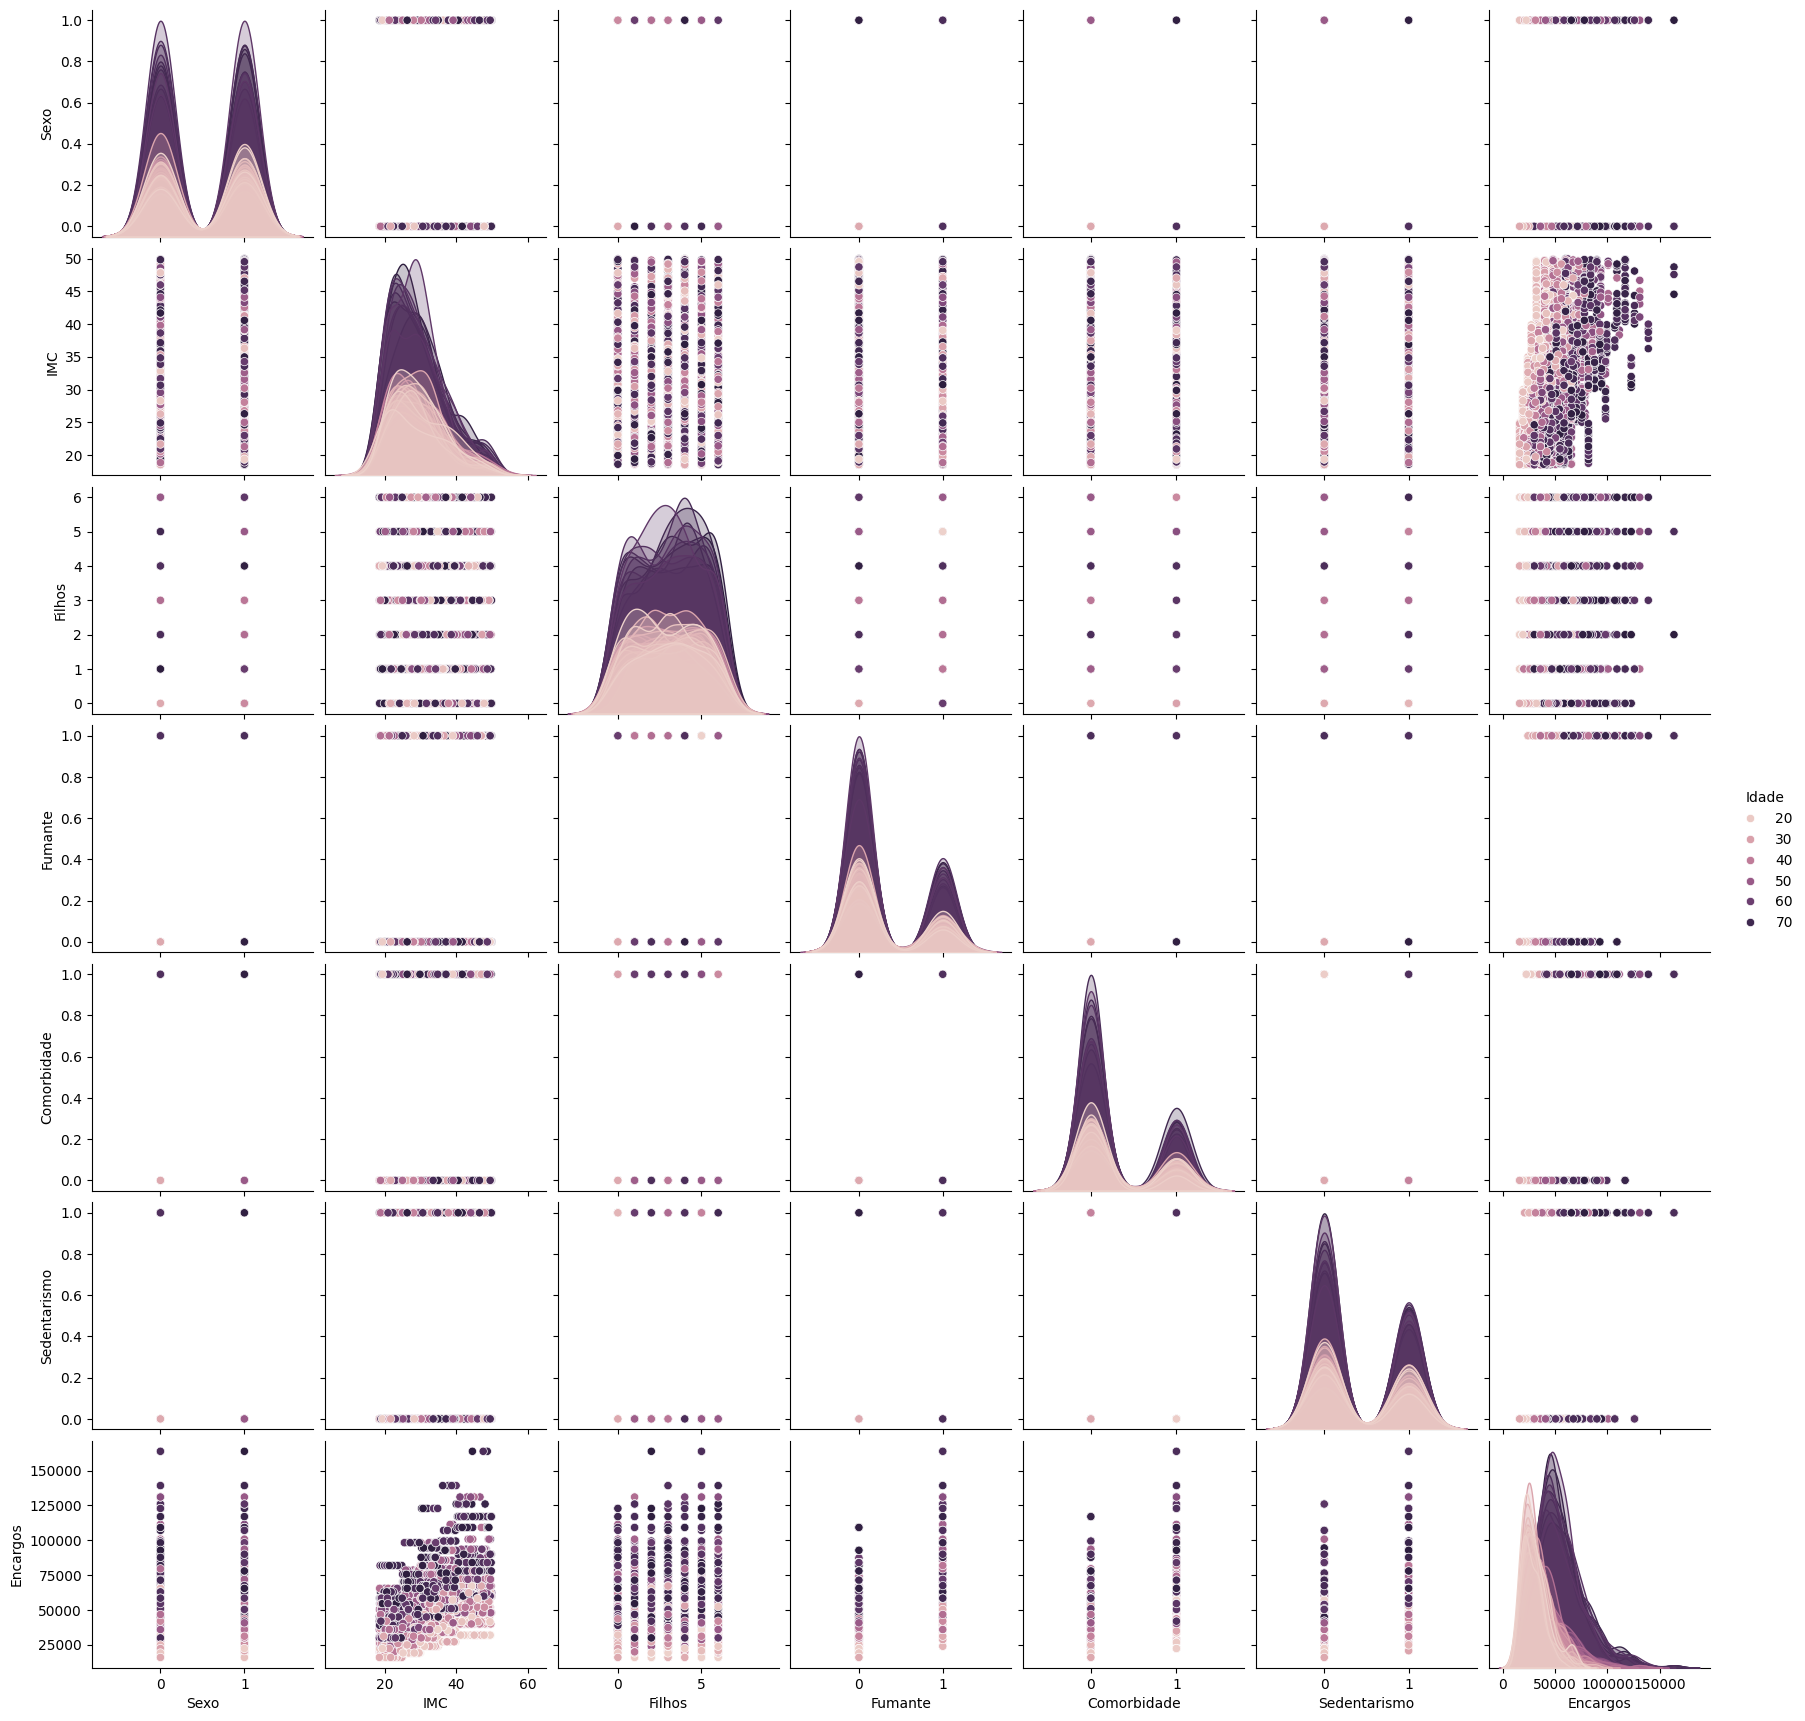

In [33]:
sb.pairplot(dados,vars=['Sexo','IMC','Filhos','Fumante','Comorbidade','Sedentarismo','Encargos'],hue="Idade")

<Axes: >

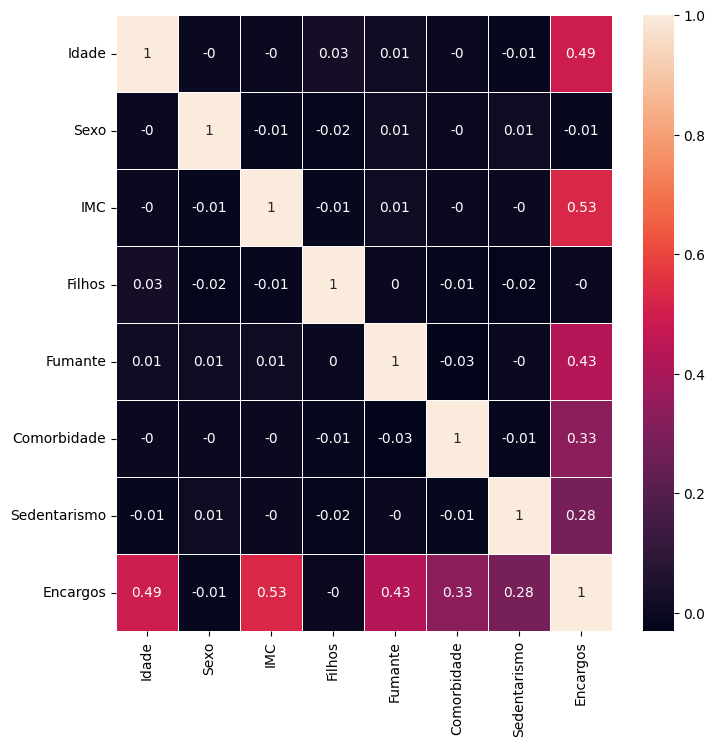

In [34]:
#analisando correlações
correlation_matrix = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

----------------------------------------------------------------------------

**Passo 3: Treinando o modelo**

In [35]:
# Conferindo se não tem valores nulos antes de treinar o modelo
print(dados.isnull().sum())

Idade           0
Sexo            0
IMC             0
Filhos          0
Fumante         0
Comorbidade     0
Sedentarismo    0
Encargos        0
dtype: int64


In [36]:
#Separando os dados
x = dados.drop(columns=['Encargos'])
y = dados['Encargos']

In [37]:
# Separando base de teste e treino
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [38]:
# A escolha do modelo DecisionTreeRegressor se deve ao fato de o modelo de classificação da árvore de decisão não entender o target custo.
dt = DecisionTreeRegressor(random_state=7, max_depth=5,min_samples_split=20, min_samples_leaf=6)

In [39]:
# Treinando
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=6, min_samples_split=20,
                      random_state=7)

In [40]:
# Nome das características
label_names = list(x.columns)

print (label_names)

['Idade', 'Sexo', 'IMC', 'Filhos', 'Fumante', 'Comorbidade', 'Sedentarismo']


[Text(0.5, 0.9166666666666666, 'x[2] <= 29.985\nsquared_error = 415556530.272\nsamples = 4000\nvalue = 45262.7'),
 Text(0.25, 0.75, 'x[0] <= 43.5\nsquared_error = 195799617.343\nsamples = 2434\nvalue = 37294.118'),
 Text(0.125, 0.5833333333333334, 'x[4] <= 0.5\nsquared_error = 79019836.316\nsamples = 933\nvalue = 27657.972'),
 Text(0.0625, 0.4166666666666667, 'x[5] <= 0.5\nsquared_error = 35418640.299\nsamples = 663\nvalue = 24033.038'),
 Text(0.03125, 0.25, 'x[6] <= 0.5\nsquared_error = 17514352.016\nsamples = 481\nvalue = 21744.532'),
 Text(0.015625, 0.08333333333333333, 'squared_error = 8667192.889\nsamples = 300\nvalue = 19669.333'),
 Text(0.046875, 0.08333333333333333, 'squared_error = 13209841.849\nsamples = 181\nvalue = 25184.088'),
 Text(0.09375, 0.25, 'x[6] <= 0.5\nsquared_error = 32315154.178\nsamples = 182\nvalue = 30081.231'),
 Text(0.078125, 0.08333333333333333, 'squared_error = 14883200.0\nsamples = 112\nvalue = 27120.0'),
 Text(0.109375, 0.08333333333333333, 'squared_err

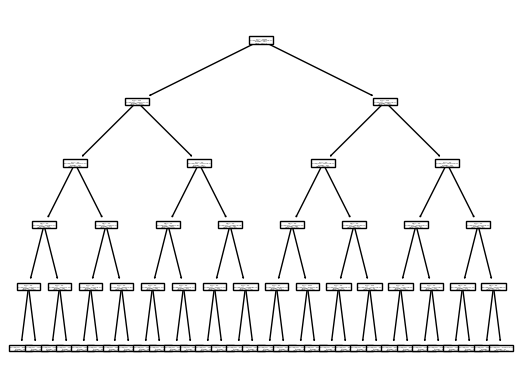

In [41]:
tree.plot_tree(dt)

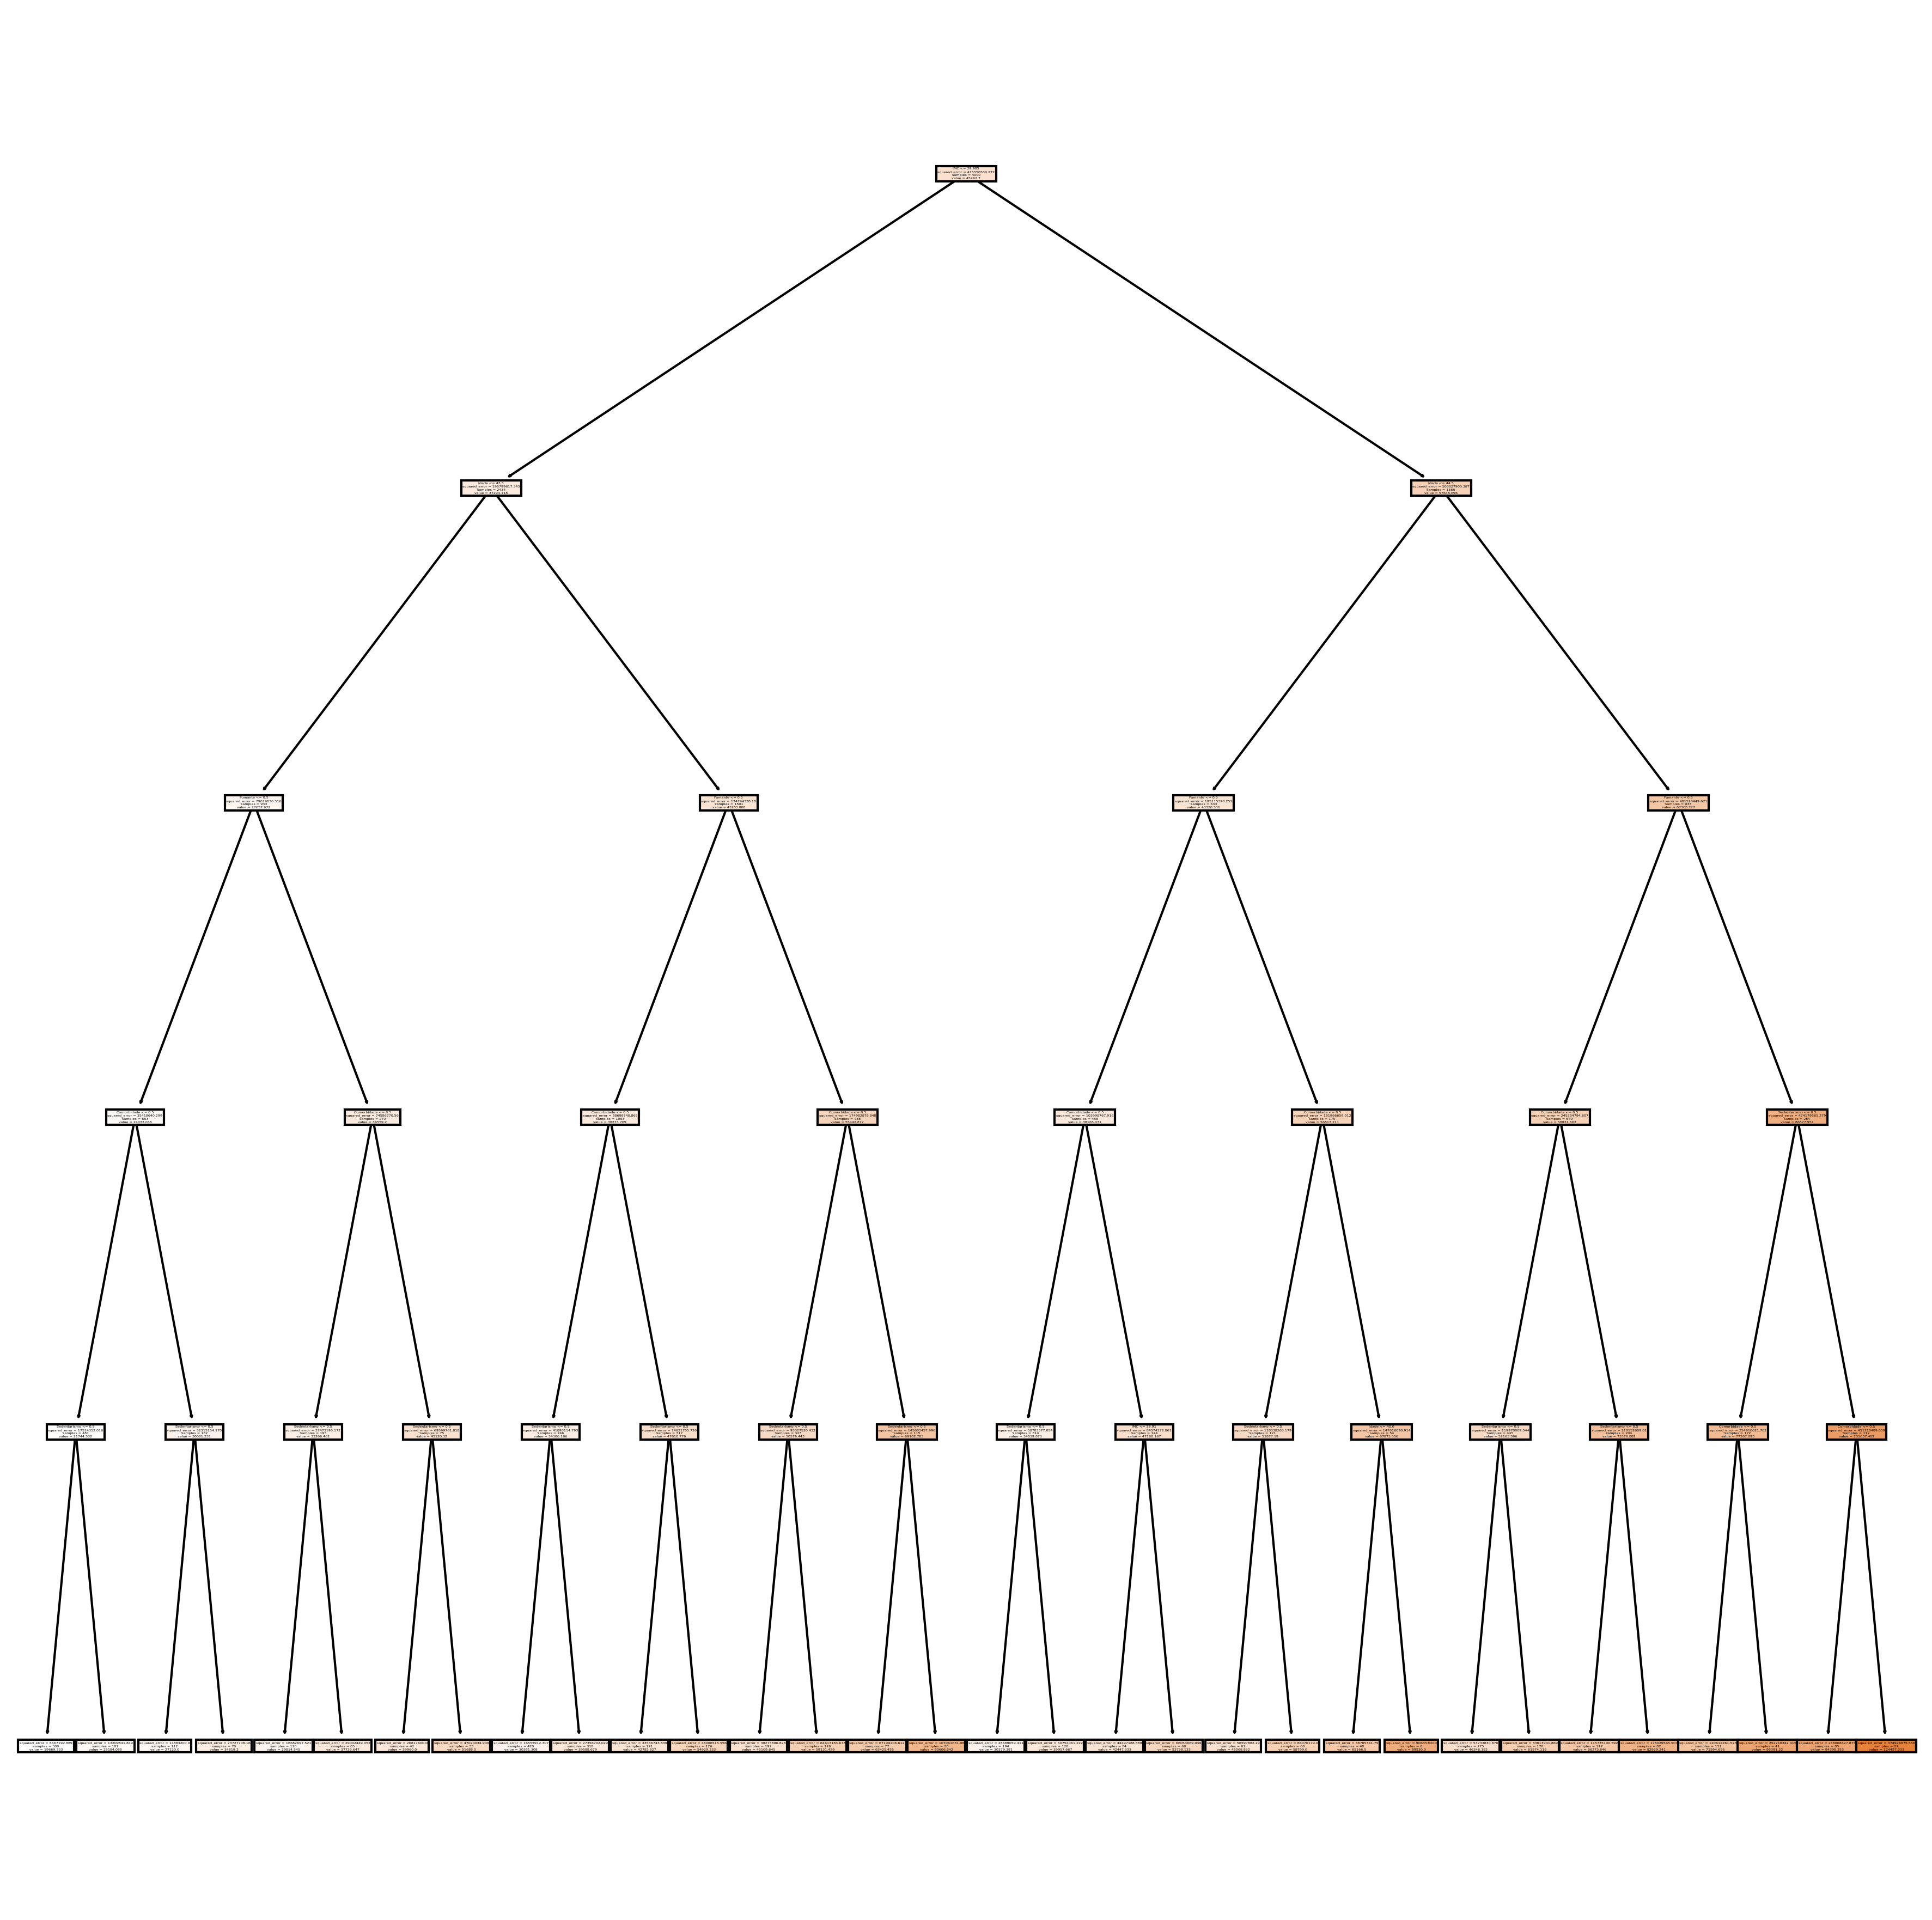

In [42]:
# características
label_names = list(dt.feature_names_in_)

#gráfico
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 15), dpi=300)

# Plotar a árvore
tree.plot_tree(dt, feature_names=label_names, filled=True)

# Salvar como imagem
plt.show()

-------------------------------------------------------------

**Passo 4: Coleta de métricas**

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
# y_predito contém as previsões do modelo
y_predito = dt.predict(x_test)

# Cálculo das métricas
mae = mean_absolute_error(y_test, y_predito)
mse = mean_squared_error(y_test, y_predito)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predito)

print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse}")
print(f"Coeficiente de Determinação (R²): {r2}")

Erro Médio Absoluto (MAE): 5292.277642468236
Erro Quadrático Médio (MSE): 57521416.240930356
Raiz do Erro Quadrático Médio (RMSE): 7584.287457693726
Coeficiente de Determinação (R²): 0.8593380051571803


-----------------------------------------------------------------------------

**Passo 5: Validando o modelo com um caso real**

In [46]:
#Parâmetros
# Novos dados de entrada
condicao_individuo = pd.DataFrame({
    'Idade': [20],
    'Sexo': [1],
    'IMC': [36.6],
    'Filhos': [3],
    'Fumante': [1],
    'Comorbidade': [1],
    'Sedentarismo': [0]
})

# Prevendo os custos
previsoes = dt.predict(condicao_individuo)

# Exibindo as previsões
for i, pred in enumerate(previsoes):
    print(f"Previsão de custo para o indivíduo {i+1}: {pred:.2f}")

Previsão de custo para o indivíduo 1: 65166.50
